This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. 

For this remedial test, I would only ask 3 Question. The score breakdown is listed in below:
- The Coding part would yield 30 Point
- The Question part would give you:
  - Q1 : 10 Point
  - Q2 : 10 Point
  - Q3 : 50 Point


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mglearn
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


As usual, read the data and check all the info

In [2]:
kan = pd.read_csv('breast-cancer.csv')

In [3]:
kan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
age            286 non-null object
menopause      286 non-null object
tumor_size     286 non-null object
inv_nodes      286 non-null object
node_caps      278 non-null object
deg_malig      286 non-null object
breast         286 non-null object
breast_quad    285 non-null object
irradiat       286 non-null object
class          286 non-null object
dtypes: object(10)
memory usage: 22.5+ KB


In [4]:
kan.describe()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
count,286,286,286,286,278,286,286,285,286,286
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,150,60,213,222,130,152,110,218,201


In [5]:
kan.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [6]:
kanker = list()

for i in kan:
    kanker.append([i, kan[i].dtype,kan[i].isna().sum(),
                 round(((kan[i].isna()).sum()/len(kan[i]))*100,2), 
                 kan[kan[i].notna()][i].nunique(), kan[i].sample(2).values])

pd.DataFrame(kanker, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,object,0,0.00,6,"['60-69', '60-69']"
1,menopause,object,0,0.00,3,"['premeno', 'premeno']"
2,tumor_size,object,0,0.00,11,"['50-54', '15-19']"
3,inv_nodes,object,0,0.00,7,"['0-2', '0-2']"
4,node_caps,object,8,2.80,2,"['no', 'no']"
5,deg_malig,object,0,0.00,3,"['1', '3']"
6,breast,object,0,0.00,2,"['left', 'left']"
7,breast_quad,object,1,0.35,5,"['central', 'left_low']"
8,irradiat,object,0,0.00,2,"['no', 'no']"
9,class,object,0,0.00,2,"['no-recurrence-events', 'recurrence-events']"


In [7]:
kan.isnull().sum()

age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      8
deg_malig      0
breast         0
breast_quad    1
irradiat       0
class          0
dtype: int64

deg_malig is better converted into integer datatype, but we could not just replace it directly using astype so we need to use another method. Find out why you can't convert it directly. 

karena deg_malig isinya merupakan float dalam bentuk string, sehingga tidak bisa langsung diubah ke dalam bentuk int, harus diubah ke dalam btk float dulu. Selain itu bentuk string dalam deg_malig berupa tanda kutip 'angka' jd harus diubah dulu ke bentuk angka biasa(tanpa tanda kutip)

In [9]:
kan['deg_malig'].unique()

array(["'3'", "'1'", "'2'"], dtype=object)

In [10]:
kan['deg_malig'].replace("'1'","1", inplace = True)
kan['deg_malig'].replace("'2'","2", inplace = True)
kan['deg_malig'].replace("'3'","3", inplace = True)
kan['deg_malig'] = kan['deg_malig'].astype(str).astype(int)
kan['deg_malig'].dtypes

dtype('int32')

In [11]:
pd.DataFrame(kan['deg_malig'].describe())

,deg_malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


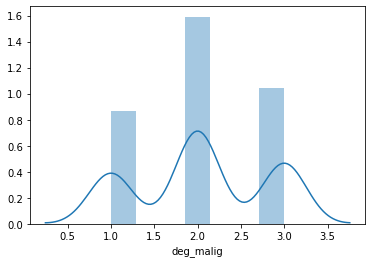

In [12]:
sns.distplot(kan['deg_malig'])

We have 2 columns that contain NaN value; node_caps and breast_quad. Let's acquire the dataframe that contain these NaN

In [13]:
kan[(kan['node_caps'].isna() | (kan['breast_quad'].isna()))]

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class
20,'50-59','lt40','20-24','0-2',NaN,1,'left','left_low','no','recurrence-events'
31,'60-69','ge40','25-29','3-5',NaN,1,'right','left_low','yes','no-recurrence-events'
50,'70-79','ge40','15-19','9-11',NaN,1,'left','left_low','yes','recurrence-events'
54,'40-49','premeno','25-29','0-2',NaN,2,'left','right_low','yes','no-recurrence-events'
71,'60-69','ge40','25-29','3-5',NaN,1,'right','left_up','yes','no-recurrence-events'
92,'50-59','lt40','20-24','0-2',NaN,1,'left','left_up','no','recurrence-events'
149,'50-59','ge40','30-34','9-11',NaN,3,'left','left_up','yes','no-recurrence-events'
240,'50-59','ge40','30-34','0-2','no',3,'left',NaN,'no','recurrence-events'
264,'50-59','ge40','30-34','9-11',NaN,3,'left','left_low','yes','no-recurrence-events'


To make things easier, let's just fill the NaN value with the mode. 

In [14]:
for column in ['node_caps','breast_quad']:
    kan[column].fillna(kan[column].mode()[0], inplace=True)

In [15]:
kan[(kan['breast_quad'].isna())]

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,class


Let's visualize using countplot for every categorical columns. Don't forget to add plt.show() after every iteration

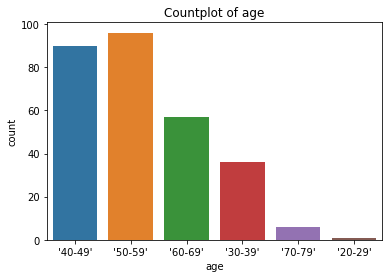

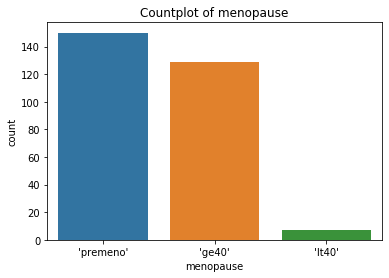

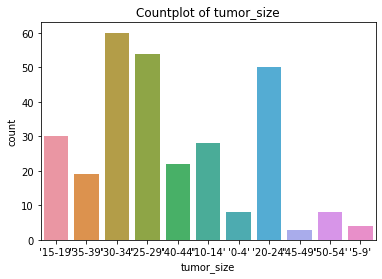

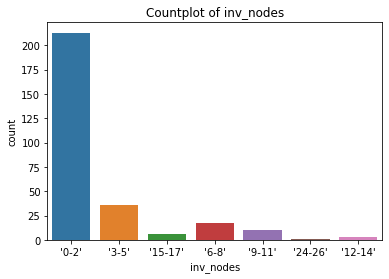

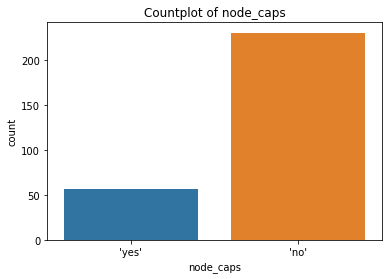

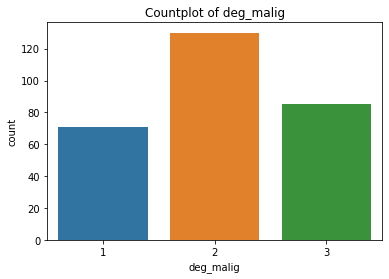

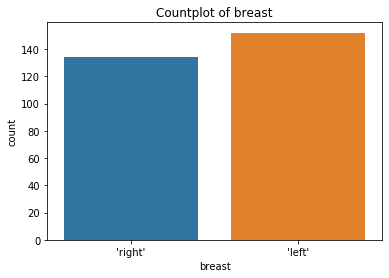

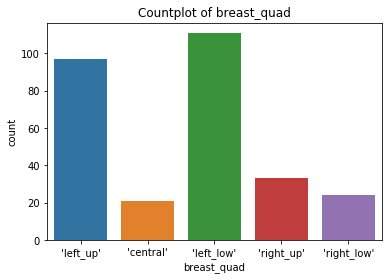

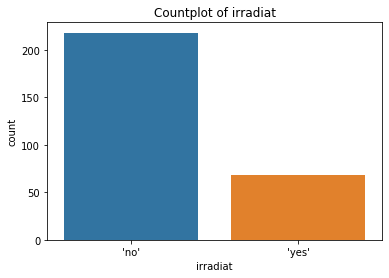

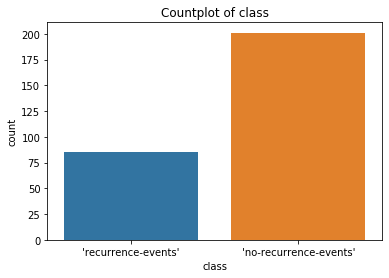

In [16]:
for i in kan.columns:
    sns.countplot(x=i,data=kan)
    plt.title("Countplot of {}".format(i))
    plt.show()
    

## Question 1

Is there any interesting pattern you could find from the plot above? 

In [17]:
kanker = pd.get_dummies(data = kan , columns= ['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig',
                                                'breast', 'breast_quad', 'irradiat'], drop_first = True)
kanker.drop('class', axis = 1, inplace = True)
kanker.head()

,age_'30-39',age_'40-49',age_'50-59',age_'60-69',age_'70-79',menopause_'lt40',menopause_'premeno',tumor_size_'10-14',tumor_size_'15-19',tumor_size_'20-24',...,inv_nodes_'9-11',node_caps_'yes',deg_malig_2,deg_malig_3,breast_'right',breast_quad_'left_low',breast_quad_'left_up',breast_quad_'right_low',breast_quad_'right_up',irradiat_'yes'
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [18]:
kanker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
age_'30-39'                286 non-null uint8
age_'40-49'                286 non-null uint8
age_'50-59'                286 non-null uint8
age_'60-69'                286 non-null uint8
age_'70-79'                286 non-null uint8
menopause_'lt40'           286 non-null uint8
menopause_'premeno'        286 non-null uint8
tumor_size_'10-14'         286 non-null uint8
tumor_size_'15-19'         286 non-null uint8
tumor_size_'20-24'         286 non-null uint8
tumor_size_'25-29'         286 non-null uint8
tumor_size_'30-34'         286 non-null uint8
tumor_size_'35-39'         286 non-null uint8
tumor_size_'40-44'         286 non-null uint8
tumor_size_'45-49'         286 non-null uint8
tumor_size_'5-9'           286 non-null uint8
tumor_size_'50-54'         286 non-null uint8
inv_nodes_'12-14'          286 non-null uint8
inv_nodes_'15-17'          286 non-null uint8
inv_nodes_'24-26'    

In [19]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
kelas= kan['class']
kelas= label_encoder.fit_transform(kelas) 
kelas=pd.Series(kelas)
kelas

0      1
1      0
2      1
3      0
4      1
      ..
281    0
282    0
283    0
284    0
285    0
Length: 286, dtype: int32

## Unsupervised Learning

We have lot of feature to be put into our unsupervised model, because of that let's use PCA to reduce our feature to 2 feature with random_state = 101. PC1 and PC2. 

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2, random_state = 101)

In [22]:
pca.fit(kanker)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=101,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
x_pca = pca.transform(kanker)

In [24]:
x_pca.shape

(286, 2)

In [25]:
x_pca

array([[ 0.52060902,  0.83817   ],
       [-0.62875887,  0.32544391],
       [-0.5643413 , -0.82460214],
       [ 0.43847924, -0.34221498],
       [ 0.92554933, -0.23070265],
       [ 0.47412222,  0.66381068],
       [-1.04616987,  0.628298  ],
       [ 0.98311406,  0.21277087],
       [ 1.19009535,  0.04161387],
       [ 0.62983871,  0.85555378],
       [ 0.03783816, -1.01219178],
       [-0.10925996,  0.89755814],
       [-0.65874286,  0.42016036],
       [-0.15158229,  0.79249303],
       [ 0.91338587, -1.03412443],
       [-0.03210715, -0.16595912],
       [ 0.02323869,  0.80044519],
       [-0.10925996,  0.89755814],
       [ 0.13706441,  0.27241129],
       [-0.9645874 ,  0.62547666],
       [-0.90057753, -0.68355754],
       [-0.03409003,  0.9748013 ],
       [-0.39650977, -0.40758349],
       [ 0.83417263,  0.75520516],
       [-0.25392838, -0.82796029],
       [-0.13713349,  0.88261721],
       [-0.36782266, -0.37667308],
       [ 0.83417263,  0.75520516],
       [-1.13261893,

In [26]:
dfpca=pd.DataFrame(x_pca, columns = ['PC1','PC2'])
dfpca.head()

,PC1,PC2
0,0.520609,0.838170
1,-0.628759,0.325444
2,-0.564341,-0.824602
3,0.438479,-0.342215
4,0.925549,-0.230703


In [27]:
pca.explained_variance_ratio_

array([0.13026836, 0.11007259])

Our 2 PC only explained around 23 percent variance of the data, but we could just work with this data right now. Let's use the scatter plot to see the distribution of the 2 PC with the class feature as the hue

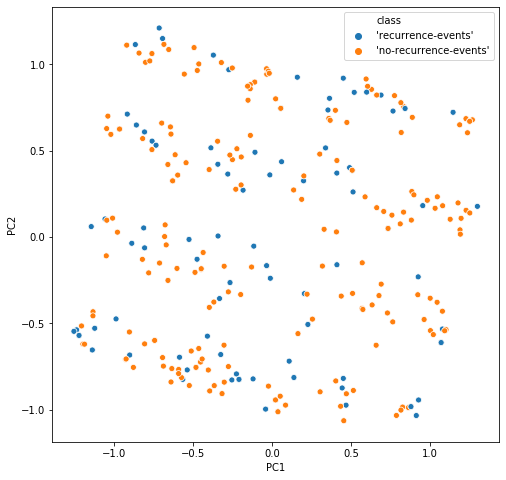

In [28]:
plt.figure(figsize = (8,8))
sns.scatterplot('PC1','PC2',kan['class'],data=pd.concat([dfpca,kelas],axis = 1))

Seems our 2 PC resulting in some scattered group, our class feature is not that separated but we could use these PCA result for our next analysis. 

Now, we would use KMeans, DBSCAN, and HDBSCAN to cluster our 2 PC. This time, I already done some analysis and find the best parameter we could use. Try to use the KMeans model with n_cluster = 5, DBSCAN model with eps = 0.1 and min_samples = 2, and HDBSCAN model with min_cluster_size =5 and min_samples = 2

Then create the scatter plot to compare the separation performance of each model. 

In [29]:
# 1. kmeans => n_cluster =5
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=5)

In [31]:
kmeans.fit(dfpca[['PC1', 'PC2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
kmeans.cluster_centers_

array([[ 0.7492132 ,  0.44146799],
       [-0.45674147,  0.71753639],
       [-0.28524954, -0.67771006],
       [ 0.6964742 , -0.60904486],
       [-0.87260978, -0.29997238]])

In [33]:
kmeans.labels_

array([0, 1, 2, 3, 3, 0, 1, 0, 0, 0, 2, 1, 1, 1, 3, 2, 1, 1, 0, 1, 4, 1,
       2, 0, 2, 1, 2, 0, 4, 2, 1, 4, 4, 1, 3, 2, 0, 4, 2, 0, 2, 0, 2, 1,
       2, 4, 1, 0, 0, 1, 2, 1, 3, 1, 3, 1, 2, 4, 1, 0, 4, 0, 1, 2, 0, 1,
       3, 2, 0, 3, 2, 1, 4, 4, 2, 4, 2, 0, 3, 1, 2, 3, 0, 1, 0, 1, 0, 0,
       4, 1, 1, 1, 1, 0, 1, 3, 0, 2, 1, 0, 3, 2, 4, 1, 3, 4, 2, 3, 1, 3,
       1, 2, 0, 0, 4, 1, 0, 1, 0, 3, 0, 0, 3, 2, 3, 4, 1, 2, 0, 2, 3, 0,
       0, 3, 2, 3, 1, 4, 1, 2, 4, 0, 0, 2, 4, 2, 0, 4, 3, 1, 3, 1, 2, 2,
       2, 4, 0, 3, 1, 1, 1, 0, 2, 2, 2, 4, 1, 3, 0, 3, 1, 1, 3, 1, 0, 0,
       0, 0, 3, 0, 0, 1, 3, 4, 3, 4, 0, 0, 1, 0, 3, 3, 4, 1, 0, 0, 0, 4,
       0, 4, 3, 0, 4, 0, 3, 4, 2, 1, 2, 3, 2, 3, 3, 4, 0, 1, 1, 2, 1, 1,
       4, 1, 3, 1, 1, 1, 4, 0, 3, 3, 3, 3, 0, 1, 1, 2, 1, 0, 1, 4, 4, 2,
       3, 0, 3, 2, 3, 4, 1, 2, 4, 2, 3, 4, 0, 2, 2, 4, 3, 1, 1, 3, 2, 0,
       4, 4, 3, 2, 1, 4, 4, 1, 0, 3, 4, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 4])

In [34]:
dfKmeans = pd.DataFrame(dfpca, columns = ['PC1', 'PC2'])
dfKmeans['Category'] = kmeans.labels_
dfKmeans.head()

,PC1,PC2,Category
0,0.520609,0.838170,0
1,-0.628759,0.325444,1
2,-0.564341,-0.824602,2
3,0.438479,-0.342215,3
4,0.925549,-0.230703,3


In [35]:
# DBSCAN
# 2. dbscan => eps = 0.1, min_samples = 2
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.1, min_samples = 2)
dbscan.fit(dfpca[['PC1', 'PC2']])
dfpca['DB'] = dbscan.labels_

In [36]:
# HDBSCAN
# 3. hdbscan => min_cluster_size = 5
from hdbscan import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size = 5, min_samples = 2)
hdbscan.fit(dfpca[['PC1', 'PC2']])
dfpca['HDB'] = hdbscan.labels_

In [37]:
hdbscan.labels_

array([ 9, 10, 24,  5,  2,  8, 15, 13, 13,  9, 22,  6, 10,  6,  0, 18, -1,
        6, -1, 15, -1,  6, 21,  9, 23,  6, 21,  9, 19, -1, 16, 20, 20,  3,
       11, 22,  1, 20, -1, 14, 23, 13, 21, 16, 22, 20,  6,  9,  8,  3, 24,
        3,  5,  4,  2,  3, 23, 19, 10, 14, 19, 13,  4, 17,  9, 10, -1, 24,
        8, 17, 24,  7, 20, 20, 18, -1, 23, 13,  5,  4, 24,  2,  9,  4, 14,
       15,  9,  9, 20, 16,  7, -1, 16,  8,  6,  0, -1, 23,  3,  9,  0, 22,
       -1,  4,  5, -1, 23, 17, 10,  2,  7, 24, 14, -1, 20, -1,  9, -1,  1,
        5, 12, -1,  0, 23,  5, 20,  4, 24, 13, 21,  2, 14, 12,  2, 23, 17,
       10, -1,  3, 20, -1, 13,  1, 22, 20, 24,  9, -1,  2, -1,  2,  4, 24,
       23, 24, 20, 14, 11,  7,  3,  3, 13, 24, 24, 18, 20, -1,  2, 13,  0,
        4,  3, 11, -1,  9,  1,  1,  9,  2, 13, 14, 15, 11, 19, 11, 20, 12,
       12,  4, -1, 17,  0, 19,  6,  1, 14,  8, -1, 14, 20,  5, 12, 19, 14,
        5, 20, 24,  7, -1,  5, 18, 11,  0, 20,  1,  7, 16, 22,  4,  6, -1,
       15,  2,  4, -1,  7

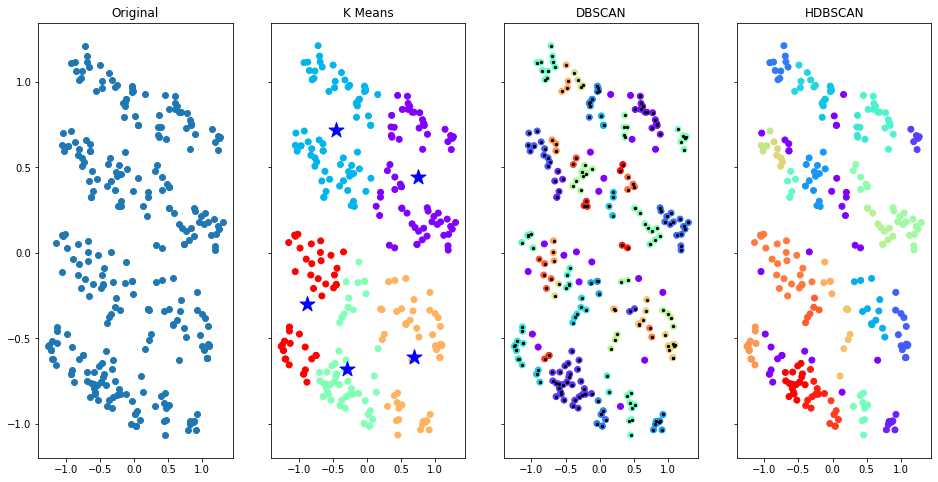

In [38]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey = True, figsize = (16, 8))

# Original scatter plot
ax1.set_title('Original')
ax1.scatter(dfpca['PC1'], dfpca['PC2'])

# K Means scatter plot
centroids = kmeans.cluster_centers_
ax2.set_title('K Means')
ax2.scatter(dfKmeans['PC1'], dfKmeans['PC2'], c = dfKmeans['Category'], cmap = 'rainbow')
ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='b', s=250)

# DBSCAN
core = dbscan.components_
ax3.set_title('DBSCAN')
ax3.scatter(dfpca['PC1'], dfpca['PC2'], c = dfpca['DB'], cmap = 'rainbow')
ax3.scatter(core[:, 0], core[:, 1], marker = 'o', c = 'black', s = 5)

# HDBSCAN
ax4.set_title('HDBSCAN')
ax4.scatter(dfpca['PC1'], dfpca['PC2'], c = dfpca['HDB'], cmap = 'rainbow')

## Question 2

In your opinion, is the clustering analysis with those 3 method actually give any insight that actually meaningful? give me your reasoning

## Supervised Modelling

First, done the Train Test Split by using random_state=101 and test size =0.2

### original data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# kanker = X, kelas= y
X_train, X_test, y_train, y_test = train_test_split(kanker, kelas, test_size=0.20,random_state = 101)

In [41]:
kelas.value_counts()

0    201
1     85
dtype: int64

we have a case of data imbalance for our class feature, for that We could use SMOTE to try oversampling our data. In this time try use SMOTE to our x_train data but keep it in new variable so we would have 2 different kind of x_train; with and without oversampling.

### oversampled

In [42]:
X_train, X_test, y_train, y_test = train_test_split(kanker, kelas, test_size=0.20,random_state = 101)

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(sampling_strategy='minority')
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train,y_train )

In [45]:
oversampled_trainX = pd.DataFrame(oversampled_trainX, columns = X_train.columns)
oversampled_trainY = pd.DataFrame(oversampled_trainY, columns = ['class'])

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 266 to 11
Data columns (total 32 columns):
age_'30-39'                228 non-null uint8
age_'40-49'                228 non-null uint8
age_'50-59'                228 non-null uint8
age_'60-69'                228 non-null uint8
age_'70-79'                228 non-null uint8
menopause_'lt40'           228 non-null uint8
menopause_'premeno'        228 non-null uint8
tumor_size_'10-14'         228 non-null uint8
tumor_size_'15-19'         228 non-null uint8
tumor_size_'20-24'         228 non-null uint8
tumor_size_'25-29'         228 non-null uint8
tumor_size_'30-34'         228 non-null uint8
tumor_size_'35-39'         228 non-null uint8
tumor_size_'40-44'         228 non-null uint8
tumor_size_'45-49'         228 non-null uint8
tumor_size_'5-9'           228 non-null uint8
tumor_size_'50-54'         228 non-null uint8
inv_nodes_'12-14'          228 non-null uint8
inv_nodes_'15-17'          228 non-null uint8
inv_nodes_'24-26'   

In [47]:
oversampled_trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 32 columns):
age_'30-39'                332 non-null uint8
age_'40-49'                332 non-null uint8
age_'50-59'                332 non-null uint8
age_'60-69'                332 non-null uint8
age_'70-79'                332 non-null uint8
menopause_'lt40'           332 non-null uint8
menopause_'premeno'        332 non-null uint8
tumor_size_'10-14'         332 non-null uint8
tumor_size_'15-19'         332 non-null uint8
tumor_size_'20-24'         332 non-null uint8
tumor_size_'25-29'         332 non-null uint8
tumor_size_'30-34'         332 non-null uint8
tumor_size_'35-39'         332 non-null uint8
tumor_size_'40-44'         332 non-null uint8
tumor_size_'45-49'         332 non-null uint8
tumor_size_'5-9'           332 non-null uint8
tumor_size_'50-54'         332 non-null uint8
inv_nodes_'12-14'          332 non-null uint8
inv_nodes_'15-17'          332 non-null uint8
inv_nodes_'24-26'    

## Question 3

This time, I would leave the supervised modelling for the class feature to be up to you. I would give some criteria that was necessary to get the maximum points. The criteria included:

1. Aim for one of the metric of your choice (either the performance metrics optimization such as increasing the Accuracy, or lowering the loss function such as Log Loss). Give me your reason why you choose these metric. Just aim for one metric, you do not need to try optimize everything.

2. Compare 3 supervise model of your choice. Try to optimize your metric for these 3 model by hyperparameter tuning and use it on both the oversampled data and normal one. Compare the model if there is a difference If you use the oversampled data or not. Then choose to work with the data that you think is the best. If you feel the model of your choice could not be optimized again, then choose the best model with the best hyperparameter. You do not need to really aim for the best model, but I want to see if you know the step of optimizing model and done hyperparameter tuning. We do not need to work on Feature Engineering for this time.

3. From your choice of model and data, use the Feature Importance method to see which feature that affecting the class feature. Explain what is your finding. There might be some randomness because of the method, but just try to explain from what the plot is showing. 

4. Lastly, try to see if your model stable or not by using the K-Fold and CV method, as well as to try find the best training size by using the learning curve method. Use all your data again (the data you use for train test split).It does not matter if you model work is based on the oversampled data or not, just use the model base on the complete data (Once again, (the data you use for train test split).

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [49]:
# accuracy_score(y_true, y_pred)

In [50]:
def compare(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    return accuracy_score(y_train, model.predict(X_train)), accuracy_score(y_test, model.predict(X_test))

In [51]:
dt = DecisionTreeClassifier(random_state = 101)
print('ORI :Accuracy Train Original Data: {}'.format(compare(X_train, y_train, X_test, y_test, dt)[0]))
print('ORI : Accuracy Test Original Data: {}\n'.format(compare(X_train, y_train, X_test, y_test, dt)[1]))
print('Over : Accuracy Train Oversampled Data:{}' .format(compare(oversampled_trainX, oversampled_trainY, X_test, y_test, dt)[0]))
print('Over : Accuracy Test Oversampled Data: {}'.format(compare(oversampled_trainX, oversampled_trainY, X_test, y_test, dt)[1]))

ORI :Accuracy Train Original Data: 0.9824561403508771
ORI : Accuracy Test Original Data: 0.5172413793103449

Over : Accuracy Train Oversampled Data:0.9879518072289156
Over : Accuracy Test Oversampled Data: 0.5344827586206896


In [52]:
rf = RandomForestClassifier(random_state = 101)
print('ORI :Accuracy Train Original Data: {}'.format(compare(X_train, y_train, X_test, y_test, rf)[0]))
print('ORI : Accuracy Test Original Data: {}\n'.format(compare(X_train, y_train, X_test, y_test, rf)[1]))
print('Over : Accuracy Train Oversampled Data:{}' .format(compare(oversampled_trainX, oversampled_trainY, X_test, y_test, rf)[0]))
print('Over : Accuracy Test Oversampled Data: {}'.format(compare(oversampled_trainX, oversampled_trainY, X_test, y_test, rf)[1]))

ORI :Accuracy Train Original Data: 0.9429824561403509
ORI : Accuracy Test Original Data: 0.6551724137931034

Over : Accuracy Train Oversampled Data:0.9849397590361446
Over : Accuracy Test Oversampled Data: 0.603448275862069


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [53]:
log = LogisticRegression(random_state = 101)
print('ORI :Accuracy Train Original Data: {}'. format(compare(X_train, y_train, X_test, y_test, log)[0]))
print('ORI : Accuracy Test Original Data: {}\n'. format(compare(X_train, y_train, X_test, y_test, log)[1]))
print('Over : Accuracy Train Oversampled Data:{}' .format(compare(oversampled_trainX, oversampled_trainY, X_test, y_test, log)[0]))
print('Over : Accuracy Test Oversampled Data: {}'.format(compare(oversampled_trainX, oversampled_trainY, X_test, y_test, log)[1]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ORI :Accuracy Train Original Data: 0.7675438596491229
ORI : Accuracy Test Original Data: 0.6896551724137931

Over : Accuracy Train Oversampled Data:0.8343373493975904
Over : Accuracy Test Oversampled Data: 0.7413793103448276


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hasil yg terbaik adalah dari : Random forest
karena dr hasil test data original dengan fit: data train- test: data test, nilainya yg plg tinggi & fit: data train-test:data train hasilnya juga cukup baik, dan nilainya perbedaanya lbh dekat dibandingkan dengan hasil decision tree

### Hypertuning original data

In [54]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Decision Tree
dtree_ori= GridSearchCV(estimator = dt,refit = 'accuracy',
                                      param_grid = {
                                        'criterion': ['gini','entropy'],
                                        'max_depth' : [None, 10, 20],
                                        'max_features' : ['auto', 'sqrt'],
                                        'max_depth' : [None, 10, 20],
                                        'min_samples_split' : [2,5,10, 20, 30],
                                        'min_samples_leaf' : [1, 3, 5, 7, 9],
                                        'class_weight' : [None, {0 : 1, 1 : 2}, {0 : 1, 1 : 3}]                         
                                      },
                                      cv = 5, n_jobs = -1, scoring = 'accuracy')
dtree_ori.fit(X_train, y_train)
print('Accuracy Original Decision Tree: {}' .format(dtree_ori.best_score_))

Accuracy Original Decision Tree: 0.7368421052631579


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [56]:
# Random forest
rf_ori = GridSearchCV(estimator = rf,refit = 'accuracy',
                              param_grid = {
                                  'n_estimators' : [100, 200, 300],
                                  'criterion' : ['gini', 'entropy'],
                                  'max_features' : ['auto', 'sqrt'],
                                  'max_depth' : [None, 10, 20],
                                  'min_samples_split' : [2,5,10, 20, 30],
                                  'min_samples_leaf' : [1, 3, 5, 7, 9],
                                  'bootstrap' : [True, False],
                                  'class_weight' : [None, {0 : 1, 1 : 2}, {0 : 1, 1 : 3}]
                              },
                              cv = 5, n_jobs = -1, scoring = 'accuracy')
rf_ori.fit(X_train, y_train)
print('Accuracy Original Random Forest: {}'.format(rf_ori.best_score_))


KeyboardInterrupt: 

In [60]:
# Logistic regression
LogisticRegression()
log_ori = GridSearchCV(estimator = log,
                              param_grid = {
                                  'penalty' : ['l1', 'l2'],
                                  'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
                                  'fit_intercept' : [True, False],
                                  'class_weight' : [None, {0 : 1, 1 : 2}, {0 : 1, 1 : 3}],
                              },
                              cv = 5, n_jobs = -1, scoring = 'accuracy')
log_ori.fit(X_train, y_train)
print('Accuracy Original Logistic Regression: {}'.format(log_ori.best_score_))

Accuracy Original Logistic Regression: 0.7456140350877193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Oversampled data

In [64]:
dtree_os = GridSearchCV(estimator = dt,refit = 'accuracy',
                                         param_grid = {
                                            'criterion': ['gini','entropy'],
                                            'max_depth' : [None, 10, 20],
                                            'max_features' : ['auto', 'sqrt'],
                                            'max_depth' : [None, 10, 20],
                                            'min_samples_split' : [2,5, 10, 20, 30],
                                            'min_samples_leaf' : [1, 3, 5, 7, 9],                       
                                         },
                                         cv = 5, n_jobs = -1, scoring = 'accuracy')
dtree_os.fit(oversampled_trainX, oversampled_trainY)
print('Accuracy Original Decision Tree: {}' .format(dtree_os.best_score_))

Accuracy Original Decision Tree: 0.7771084337349398


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
# Logistic regression
log_os = GridSearchCV(estimator = log,
                              param_grid = {
                                  'penalty' : ['l1', 'l2'],
                                  'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
                                  'fit_intercept' : [True, False]
                              },
                             cv = 5, n_jobs = -1, scoring = 'accuracy')
log_os.fit(oversampled_trainX, oversampled_trainY)
print('Accuracy Oversampled Logistic Regression: {}'.format(log_os.best_score_))



Accuracy Oversampled Logistic Regression: 0.7740963855421686


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
# Random forest
rf_os = GridSearchCV(estimator = rf,
                              param_grid = {
                                  'n_estimators' : [100, 200, 300],
                                  'criterion' : ['gini', 'entropy'],
                                  'max_features' : ['auto', 'sqrt'],
                                  'max_depth' : [None, 10, 20],
                                  'min_samples_split' : [10, 20, 30, 40, 50],
                                  'min_samples_leaf' : [1, 3, 5, 7, 9],
                                  'bootstrap' : [True, False],
                              },
                              cv = 5, n_jobs = -1, scoring = 'accuracy')
rf_os.fit(oversampled_trainX, oversampled_trainY)
print('Accuracy Oversampled Random Forest: {}'.format(rf_os.best_score_))

KeyboardInterrupt: 

akurasi decision tree untuk data yg sudah di smote lebih tinggi nilainya dari akurasi logistic regression data smote

In [72]:
dtree_os.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [73]:
## Tes ulang setelah lihat hasil gridcv

from sklearn.tree import DecisionTreeClassifier

puun = DecisionTreeClassifier(criterion = 'entropy', max_depth= None ,min_samples_leaf= 1, 
                               min_samples_split= 5, splitter= 'random', max_features= 'auto' )

puun.fit(oversampled_trainX, oversampled_trainY)

## Prediction & Evaluation

prediksi = puun.predict(X_test)

probability = puun.predict_proba(X_test)

probability

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediksi))




              precision    recall  f1-score   support

           0       0.60      0.91      0.73        35
           1       0.40      0.09      0.14        23

    accuracy                           0.59        58
   macro avg       0.50      0.50      0.44        58
weighted avg       0.52      0.59      0.50        58



hasil akurasi untuk data oversample(yg sudah di smote) untuk decision tree meningkat dari 0.53 menjadi 0.59 setelah menggunakan parameter hasil dari gridsearch cv

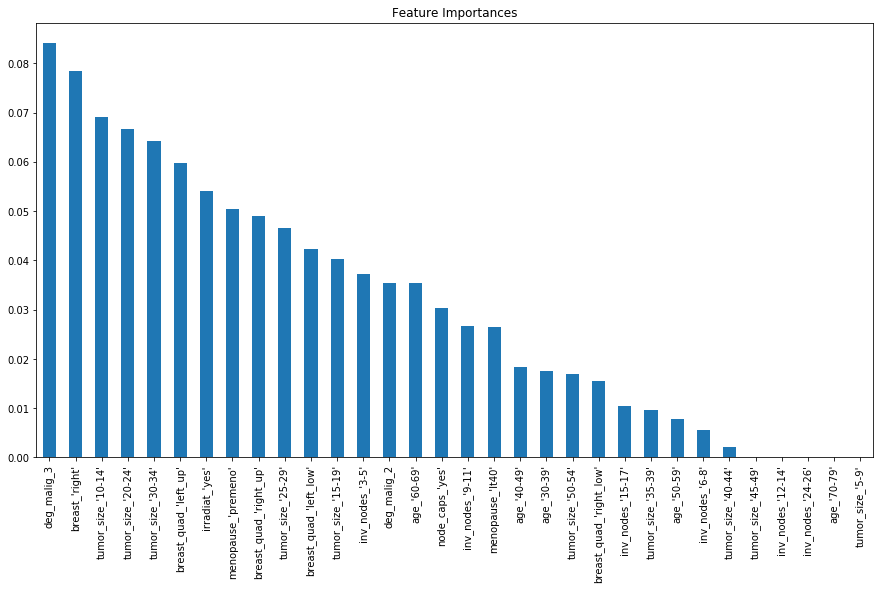

In [75]:
plt.figure(figsize = (15,8))

fi = pd.Series(puun.feature_importances_, oversampled_trainX.columns).sort_values(ascending = False)
fi.plot(kind = 'bar', title ='Feature Importances')

In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import matthews_corrcoef, f1_score, classification_report, roc_auc_score, confusion_matrix, log_loss

In [81]:
def clf_error(kanker,kelas,model):
    from sklearn.metrics import classification_report,matthews_corrcoef,f1_score,roc_auc_score,accuracy_score,confusion_matrix,log_loss
    predictions=model.predict(kanker)
    predictProba=model.predict_proba(kanker)
    return {
        'report':classification_report(kelas,predictions),
        'matthews':matthews_corrcoef(kelas,predictions),
        'f1':f1_score(kelas,predictions,average='macro'),
        'roc':roc_auc_score(kelas,predictProba[:,1]),
        'accuracy':accuracy_score(kelas,predictions),
        'confusion':confusion_matrix(kelas,predictions),
        'logloss':log_loss(kelas,predictProba)}
        
def clf_metrics(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    train_error=clf_error(X_train,y_train,model)
    validation_error=clf_error(X_test,y_test,model)
    return train_error, validation_error


def KF_validation_clf(data, target,estimator,K,**kwargs):
    from sklearn.model_selection import KFold
    train_errors=[]
    validation_errors=[]
    
    kf=KFold(K)
    fold=0
    try:
        data.head()
    except:
        data=pd.DataFrame(data.toarray())
    for train_index,val_index in kf.split(data,target):
        fold+=1
        start=time()
        #split data
        X_train,X_val=data.iloc[train_index],data.iloc[val_index]
        y_train,y_val=target[train_index],target[val_index]
        
        X_train,y_train=SMOTE().fit_resample(X_train,y_train)

        #instantiate model
        model=estimator

        #calculate errors
        train_error,val_error=clf_metrics(X_train,y_train,X_val,y_val,model)

        #append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
        
        print(f'...finished fold {fold} in {round(time()-start,3)}s')
        
    
    index=[]

    columns=[]
    scoring=['Accuracy','F1 Score','LogLoss','Matthews Correlation Coefficient','ROC AUC']
    keys=[x.lower().split()[0] for x in scoring]

    for i in scoring:
        columns.append(f'Train_{i}')
        columns.append(f'Test_{i}')
    
    df={i:[] for i in columns}
    

    for i,tr,val in zip(range(1,K+1),train_errors,validation_errors):
        index.append('iteration {}'.format(i))
        for col,key in zip(scoring,keys):
            df[f'Train_{col}'].append(tr[key])
            df[f'Test_{col}'].append(val[key])

    index.append('Average')
    for key,val in df.items():
        df[key].append(sum(val)/len(val))

    columns=[]
    for i in scoring:
        columns.append(f'Train_{i}')
        columns.append(f'Test_{i}')
    return train_errors,validation_errors,pd.DataFrame(df,index)

In [82]:
train_errors,validation_errors,dfValidation=KF_validation_clf(kanker,kelas,rf,5)
dfValidation

NameError: name 'time' is not defined

In [83]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(X,y):
    # split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    # instantiative model
    rf_new = RandomForestClassifier(n_estimators = 100, min_samples_split = 20, min_samples_leaf = 1,
                                max_features = 'sqrt', max_depth = 10, criterion = 'entropy', bootstrap = False)
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc_new)
    # append to appropriate list
    train_errors.append(train_error)

NameError: name 'kf' is not defined